#Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import warnings

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
raw_df=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
raw_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
raw_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
raw_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
#Checking The Null Values
raw_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

From above, it is clear that In our data there is no Na or Null Values

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

From above info we see that our data sets contains total 22 columns whose data types are float64

In [7]:
raw_df.sample(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
150307,1.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,11.0,4.0,7.0
121539,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,13.0,4.0,5.0
102649,1.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,4.0,7.0
51041,0.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,7.0
53120,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,7.0
241975,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,15.0,0.0,1.0,0.0,8.0,6.0,6.0
58110,0.0,0.0,0.0,1.0,28.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
96259,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,3.0,3.0
75292,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,5.0,8.0
224606,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0


In [8]:
raw_df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

#Prior Probability-Based Accuracy

In [9]:
print(raw_df['Diabetes_binary'].value_counts())
print(raw_df['Diabetes_binary'].value_counts(normalize=True))

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64


In [10]:
# Count the occurrences of each class
class_counts = raw_df['Diabetes_binary'].value_counts()

# Calculate the prior probabilities
prior_probabilities = class_counts / len(raw_df)

# Display the prior probabilities
print(prior_probabilities)

0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64


In [11]:
# Accuracy for prediction based on prior probabilities
prior_accuracy = max(prior_probabilities)
print("Accuracy for Prediction Based on Prior Probabilities:", prior_accuracy)

Accuracy for Prediction Based on Prior Probabilities: 0.8606669820245979


#Class Distribution Chart

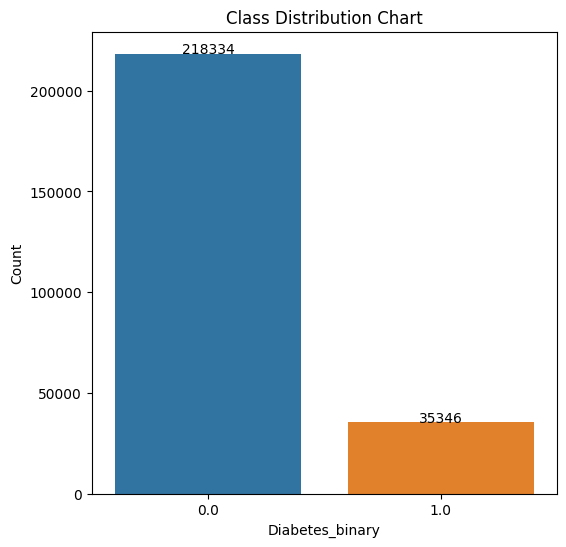

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64


In [12]:
# Count the occurrences of each class
class_distribution = raw_df['Diabetes_binary'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Diabetes_binary', data=raw_df)
plt.title('Class Distribution Chart')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')

# Display values on top of the bars
for p in range(len(class_distribution)):
    plt.text(p, class_distribution[p], class_distribution[p], ha='center')

# Show the chart
plt.show()

# Print the class distribution
print(class_distribution)

#AGE

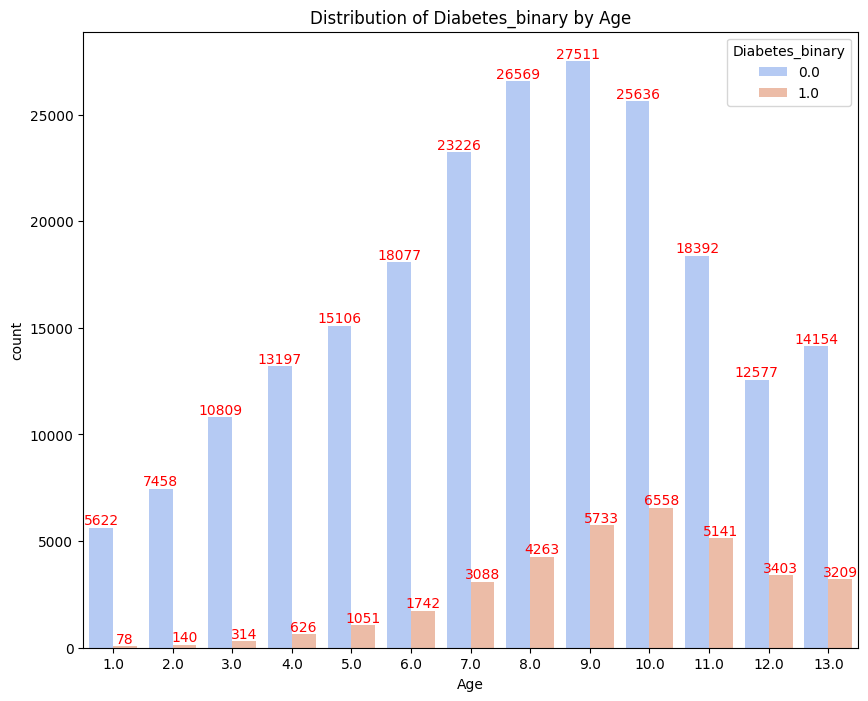

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Age', hue='Diabetes_binary', data=raw_df, palette='coolwarm')
plt.title('Distribution of Diabetes_binary by Age')

# Get the current axis on the current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), color='red', ha='center', va='bottom')

plt.show()


In [14]:
# Calculate the counts and relative proportional changes
age_counts = raw_df.groupby(['Age', 'Diabetes_binary']).size().unstack().fillna(0)
age_proportions = age_counts.div(raw_df.groupby('Age').size(), axis=0)

# Print the counts and relative proportions
print("Counts:")
print(age_counts)
print("\nRelative Proportions:")
print(age_proportions)


Counts:
Diabetes_binary    0.0   1.0
Age                         
1.0               5622    78
2.0               7458   140
3.0              10809   314
4.0              13197   626
5.0              15106  1051
6.0              18077  1742
7.0              23226  3088
8.0              26569  4263
9.0              27511  5733
10.0             25636  6558
11.0             18392  5141
12.0             12577  3403
13.0             14154  3209

Relative Proportions:
Diabetes_binary       0.0       1.0
Age                                
1.0              0.986316  0.013684
2.0              0.981574  0.018426
3.0              0.971770  0.028230
4.0              0.954713  0.045287
5.0              0.934951  0.065049
6.0              0.912105  0.087895
7.0              0.882648  0.117352
8.0              0.861735  0.138265
9.0              0.827548  0.172452
10.0             0.796297  0.203703
11.0             0.781541  0.218459
12.0             0.787046  0.212954
13.0             0.815182  0.1

#HighBP

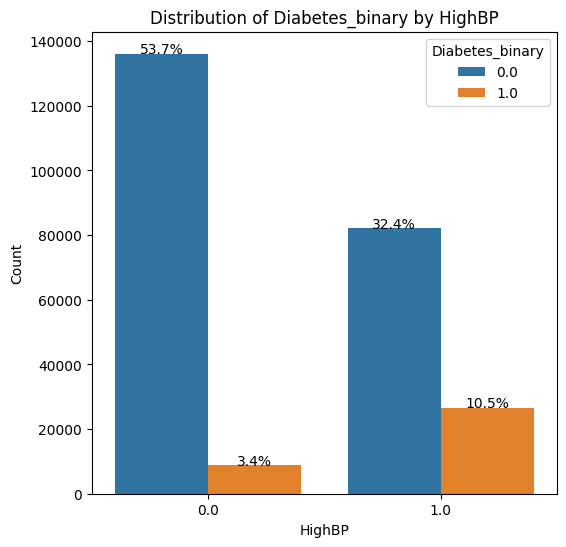

  HighBP Diabetes_binary   Count  Percentage
0      0               0  136109   53.653816
1      0               1    8742    3.446074
2      1               0   82225   32.412882
3      1               1   26604   10.487228


<ipython-input-15-02da21bf4c0e>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'HighBP': value, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-15-02da21bf4c0e>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'HighBP': value, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-15-02da21bf4c0e>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'HighBP': value, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-15-02da21bf4c0e>:28: FutureWarning: The 

In [15]:
# Create a countplot to visualize the distribution of 'Diabetes_binary' by 'HighBP'
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='HighBP', hue='Diabetes_binary', data=raw_df)

# Calculate and display the percentage text on top of the bars
total = len(raw_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of Diabetes_binary by HighBP')
plt.xlabel('HighBP')
plt.ylabel('Count')

# Show the chart
plt.show()

# Create a DataFrame to display the results
result_df = pd.DataFrame(columns=['HighBP', 'Diabetes_binary', 'Count', 'Percentage'])

# Calculate the counts and percentages
for value in ['0', '1']:
    for diabetes_value in ['0', '1']:
        count = len(raw_df[(raw_df['HighBP'] == int(value)) & (raw_df['Diabetes_binary'] == int(diabetes_value))])
        percentage = 100 * count / total
        result_df = result_df.append({'HighBP': value, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)

# Print the result DataFrame
print(result_df)


#HvyAlcoholConsump

  HvyAlcoholConsump Diabetes_binary     Count Percentage
0                 0               0  204910.0      80.8%
1                 0               1   13424.0       5.3%
2                 1               0   34514.0      13.6%
3                 1               1     832.0       0.3%


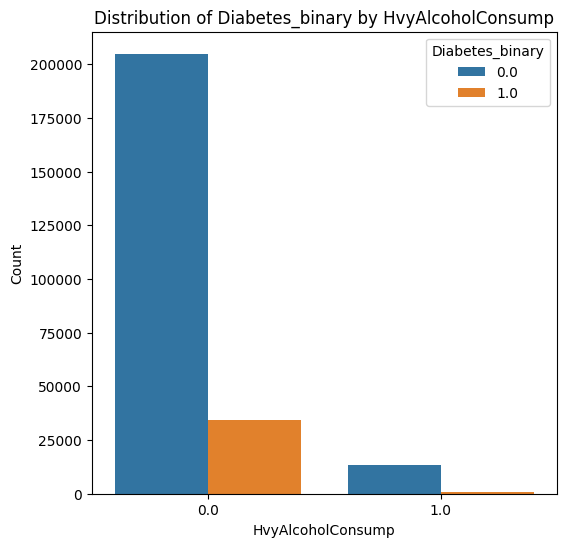

In [16]:
# Create a countplot to visualize the distribution of 'Diabetes_binary' by 'HvyAlcoholConsump'
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_binary', data=raw_df)

# Calculate the counts and percentages
total = len(raw_df)
counts = []
percentages = []
for p in ax.patches:
    counts.append(p.get_height())
    percentage = 100 * p.get_height() / total
    percentages.append(f'{percentage:.1f}%')

# Create a DataFrame to display the results
result_df = pd.DataFrame({'HvyAlcoholConsump': ['0', '0', '1', '1'],
                          'Diabetes_binary': ['0', '1', '0', '1'],
                          'Count': counts,
                          'Percentage': percentages})

# Print the result
print(result_df)

plt.title('Distribution of Diabetes_binary by HvyAlcoholConsump')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')

# Show the chart
plt.show()


#Education

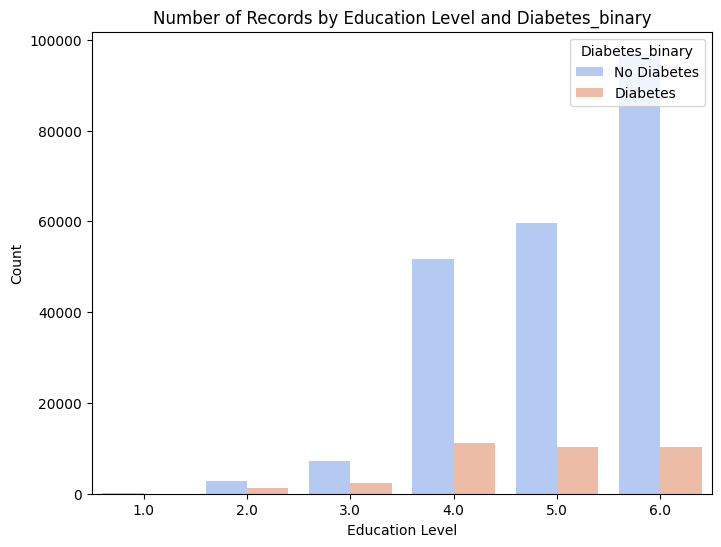

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Diabetes_binary', data=raw_df, palette='coolwarm')
plt.title('Number of Records by Education Level and Diabetes_binary')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Diabetes_binary', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0)
plt.show()

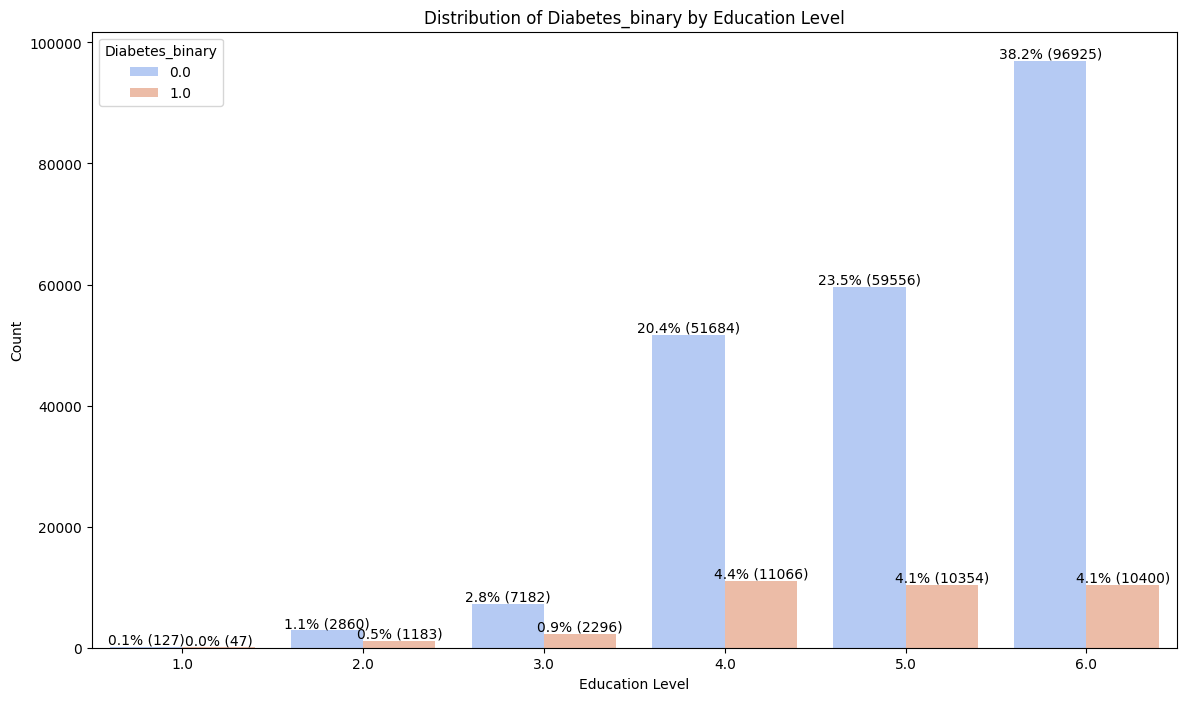

In [18]:
# Create a countplot to visualize the distribution of 'Diabetes_binary' by 'Education'
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Education', hue='Diabetes_binary', data=raw_df, palette='coolwarm')

# Calculate and display the percentage text on top of the bars
total = len(raw_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    count = int(p.get_height())
    ax.annotate(f'{percentage} ({count})', (x, y), ha='center', va='bottom')

plt.title('Distribution of Diabetes_binary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the chart
plt.show()


<ipython-input-19-9002e23eeda5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Education': education_level, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-19-9002e23eeda5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Education': education_level, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-19-9002e23eeda5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Education': education_level, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)
<ipython-input-1

    Education  Diabetes_binary  Count Percentage
0         4.0  Diabetes_binary    127       0.1%
1         4.0  Diabetes_binary   2860       1.1%
2         6.0  Diabetes_binary   7182       2.8%
3         3.0  Diabetes_binary  51684      20.4%
4         5.0  Diabetes_binary  59556      23.5%
5         2.0  Diabetes_binary  96925      38.2%
6         4.0  Diabetes_binary     47       0.0%
7         6.0  Diabetes_binary   1183       0.5%
8         3.0  Diabetes_binary   2296       0.9%
9         5.0  Diabetes_binary  11066       4.4%
10        2.0  Diabetes_binary  10354       4.1%
11        1.0  Diabetes_binary  10400       4.1%


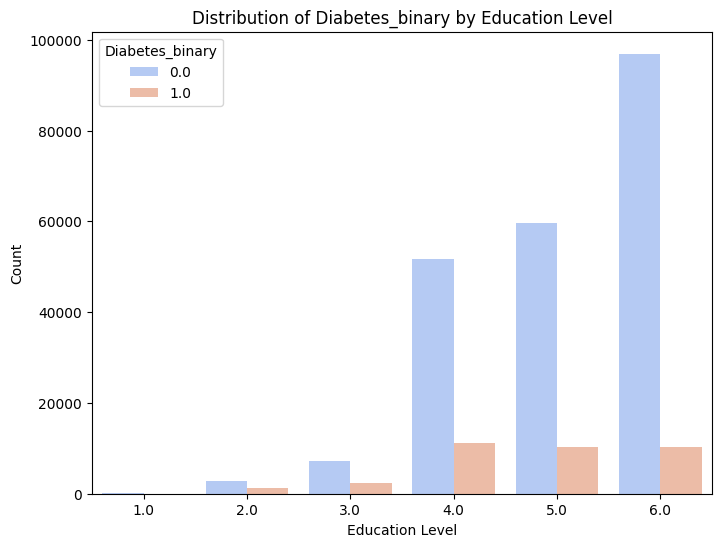

In [19]:
# Assuming 'Education' is the name of the variable in your dataset
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Education', hue='Diabetes_binary', data=raw_df, palette='coolwarm')

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Education', 'Diabetes_binary', 'Count', 'Percentage'])

# Calculate and display the percentage text on top of the bars
total = len(raw_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    education_level = raw_df['Education'].unique()[int(x)]  # Get the actual education level
    diabetes_value = ax.get_legend().get_title().get_text()  # Get the hue (Diabetes_binary)
    result_df = result_df.append({'Education': education_level, 'Diabetes_binary': diabetes_value, 'Count': count, 'Percentage': percentage}, ignore_index=True)

# Print the result DataFrame
print(result_df)

plt.title('Distribution of Diabetes_binary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the chart
plt.show()


In [20]:
#Project Part 3 #NB

In [21]:
#'Diabetes_binary' target variable
target_variable = 'Diabetes_binary'

# Define the feature matrix X by excluding the target variable
X = raw_df.drop(target_variable, axis=1)

# Display the first few rows of the feature matrix
print(X.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

In [22]:
# Define the feature matrix X by excluding the target variable
X = raw_df.drop('Diabetes_binary', axis=1)

# Define the target variable y
y = raw_df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7720

Confusion Matrix:
[[35211  8528]
 [ 3040  3957]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43739
         1.0       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



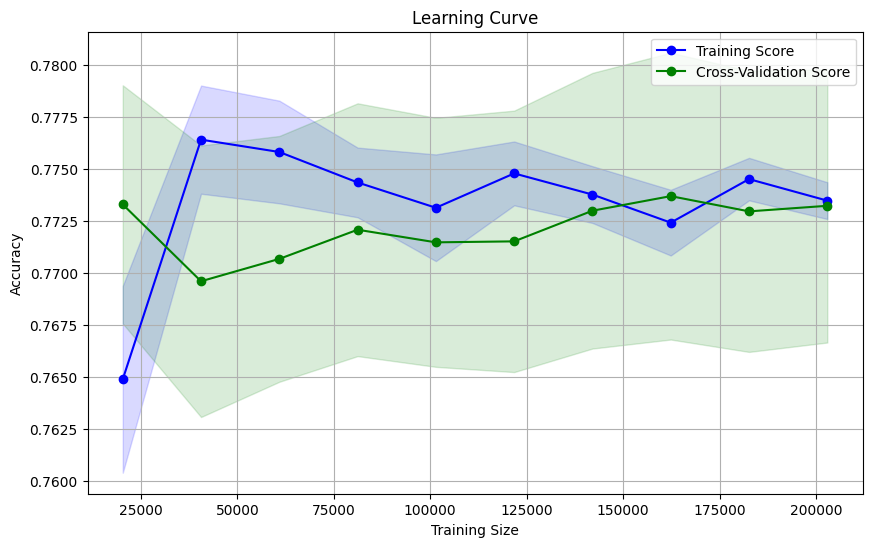

In [23]:
# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    nb_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [24]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43739
         1.0       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



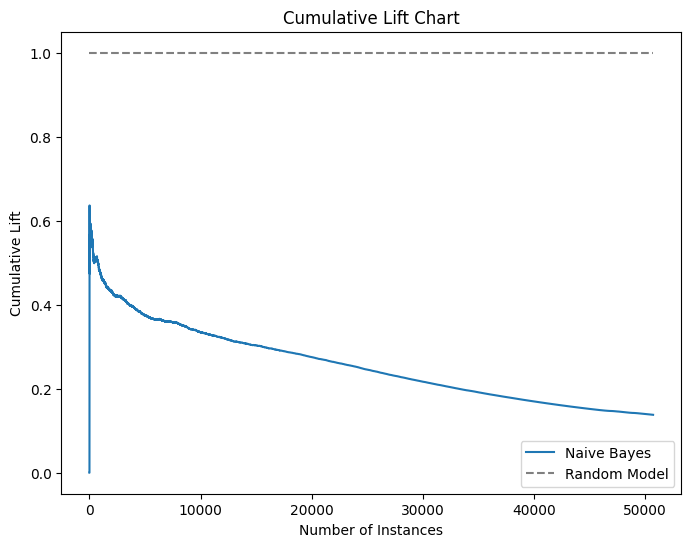

In [25]:
# Make predictions on the test set
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate the Cumulative Lift Chart
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
sorted_indices = np.argsort(y_prob)[::-1]
sorted_labels = y_test.to_numpy()[sorted_indices]  # Convert to NumPy array to avoid indexing issues

cumulative_positives = np.cumsum(sorted_labels)
cumulative_total = np.arange(1, len(sorted_labels) + 1)

cumulative_lift = cumulative_positives / cumulative_total

# Plot the Cumulative Lift Chart
plt.figure(figsize=(8, 6))
plt.plot(cumulative_total, cumulative_lift, label='Naive Bayes')
plt.plot([1, len(sorted_labels)], [1, 1], linestyle='--', color='grey', label='Random Model')
plt.title('Cumulative Lift Chart')
plt.xlabel('Number of Instances')
plt.ylabel('Cumulative Lift')
plt.legend()
plt.show()


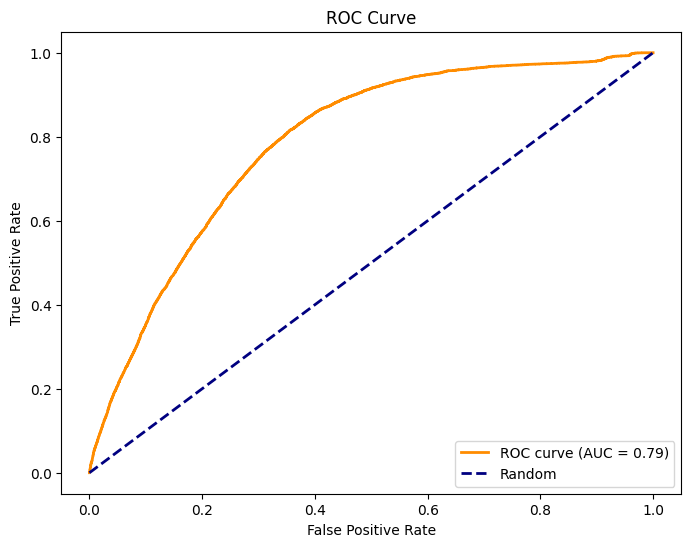

Area Under the Curve (AUC): 0.79


In [26]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC value
print('Area Under the Curve (AUC): {:.2f}'.format(roc_auc))


In [27]:
#NB

In [28]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid (var_smoothing values)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final model
optimal_nb_classifier = GaussianNB(**best_params)
optimal_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Optimal Naive Bayes Classifier Accuracy:', accuracy)

Optimal Naive Bayes Classifier Accuracy: 0.7722130242825607


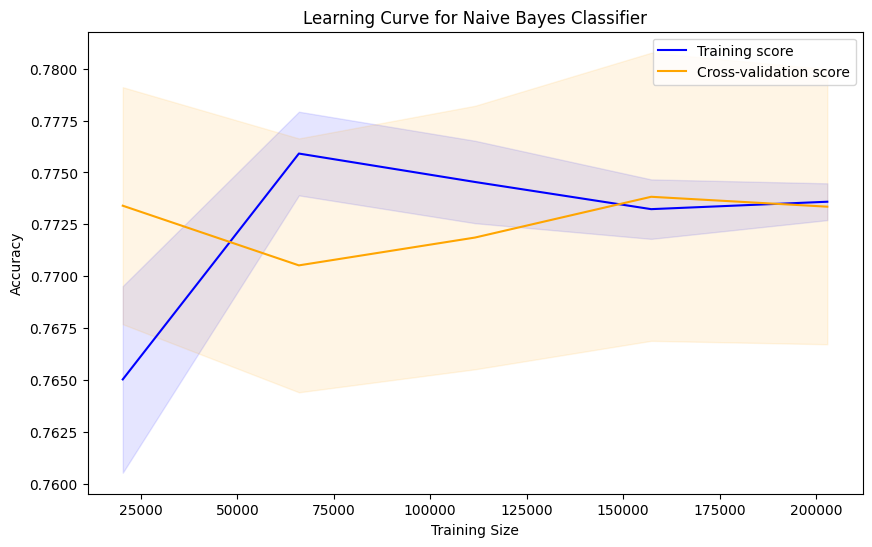

In [29]:
# Define the learning curve parameters
train_sizes, train_scores, validation_scores = learning_curve(
    optimal_nb_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation of training scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='blue'
)
plt.fill_between(
    train_sizes,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.1,
    color='orange'
)
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, validation_scores_mean, label='Cross-validation score', color='orange')
plt.title('Learning Curve for Naive Bayes Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [30]:
# Make predictions on the test set
y_pred = optimal_nb_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43739
         1.0       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



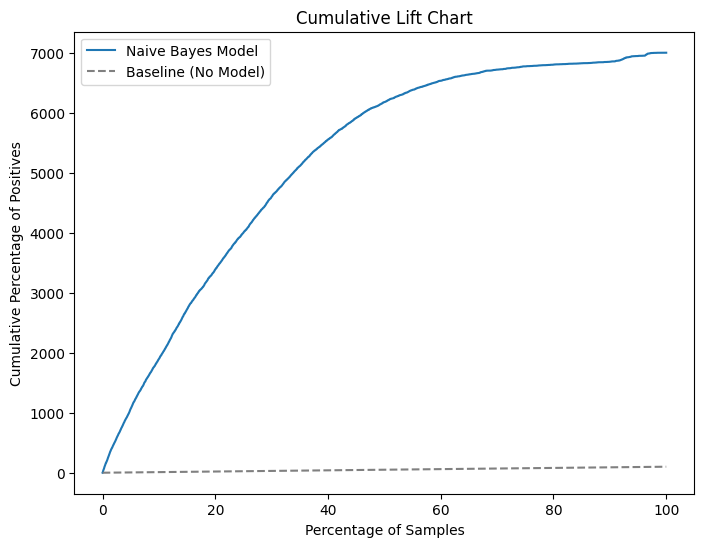

In [31]:
# Convert 'y_test' to a Pandas Series for proper indexing
y_test = pd.Series(y_test)

# Calculate the cumulative percentages
total_samples = len(y_test)
sorted_indices = np.argsort(y_prob)[::-1]
sorted_labels = y_test.iloc[sorted_indices]

cumulative_positives = np.cumsum(sorted_labels)
cumulative_percent = np.arange(1, total_samples + 1) / total_samples * 100

# Calculate the baseline (no model) cumulative percentages
baseline_percent = np.arange(1, total_samples + 1) / total_samples * 100

# Plot the cumulative lift chart
plt.figure(figsize=(8, 6))
plt.plot(cumulative_percent, cumulative_positives, label='Naive Bayes Model')
plt.plot(cumulative_percent, baseline_percent, linestyle='--', color='gray', label='Baseline (No Model)')
plt.title('Cumulative Lift Chart')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.show()


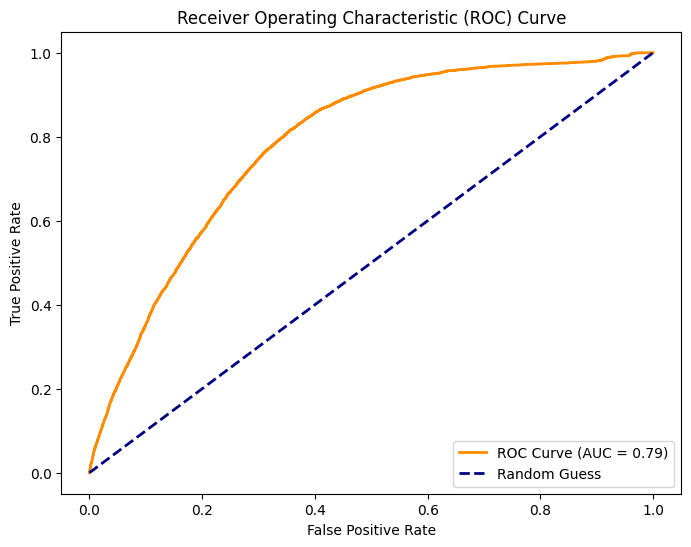

ROC-AUC: 0.7860


In [32]:
# Assuming 'y_test' is true test labels and 'y_prob' is the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display ROC-AUC value
print(f'ROC-AUC: {roc_auc:.4f}')


In [33]:
#DT

In [34]:
# Define the feature matrix X by excluding the target variable
X = raw_df.drop('Diabetes_binary', axis=1)

# Define the target variable y
y = raw_df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7982

Confusion Matrix:
[[38163  5576]
 [ 4660  2337]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43739
         1.0       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



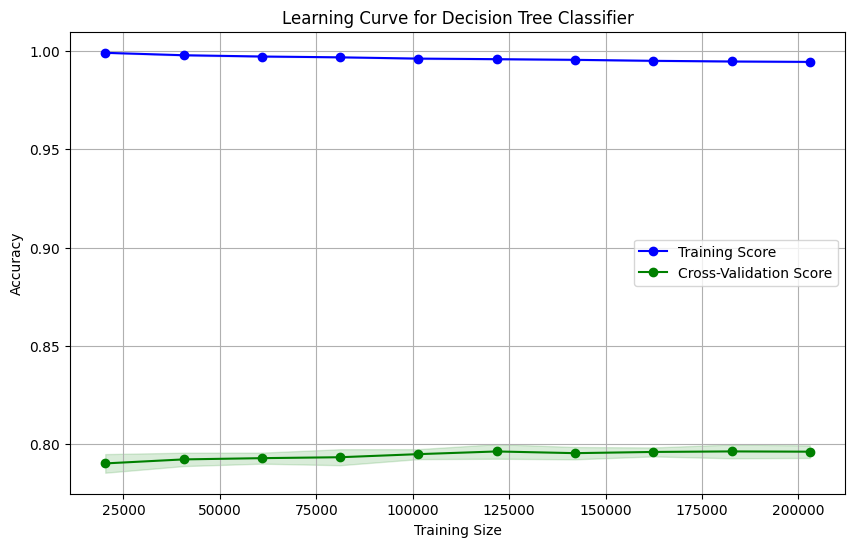

In [35]:
# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [36]:
!pip install scikit-plot

In [37]:
import scikitplot as skplt

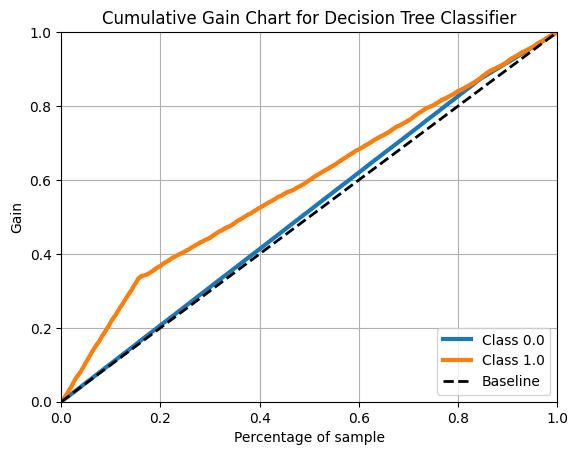

In [38]:
# Make predictions on the test set
y_prob_dt = dt_classifier.predict_proba(X_test)

# Plot Cumulative Gain Chart
skplt.metrics.plot_cumulative_gain(y_test, y_prob_dt)
plt.title('Cumulative Gain Chart for Decision Tree Classifier')
plt.show()

In [39]:
# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance and print the classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Classification Report on Test Set:")
print(class_report)

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43739
         1.0       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



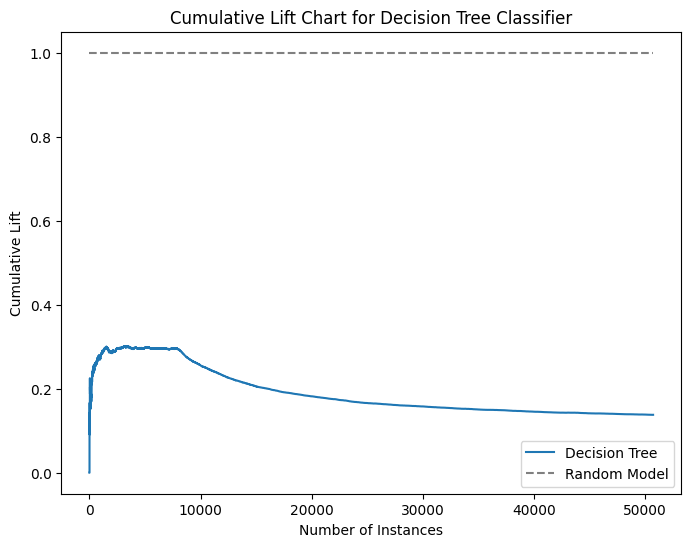

In [40]:
# Make predictions on the test set
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the Cumulative Lift Chart
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt, pos_label=1)
sorted_indices_dt = np.argsort(y_prob_dt)[::-1]
sorted_labels_dt = y_test.to_numpy()[sorted_indices_dt]  # Convert to NumPy array to avoid indexing issues

cumulative_positives_dt = np.cumsum(sorted_labels_dt)
cumulative_total_dt = np.arange(1, len(sorted_labels_dt) + 1)

cumulative_lift_dt = cumulative_positives_dt / cumulative_total_dt

# Plot the Cumulative Lift Chart for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(cumulative_total_dt, cumulative_lift_dt, label='Decision Tree')
plt.plot([1, len(sorted_labels_dt)], [1, 1], linestyle='--', color='grey', label='Random Model')
plt.title('Cumulative Lift Chart for Decision Tree Classifier')
plt.xlabel('Number of Instances')
plt.ylabel('Cumulative Lift')
plt.legend()
plt.show()


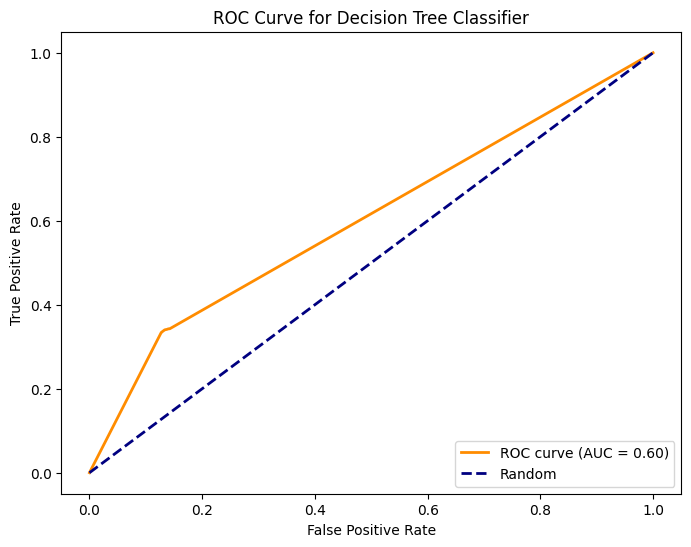

Area Under the Curve (AUC) for Decision Tree: 0.60


In [41]:
# Make predictions on the test set
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Display AUC value for Decision Tree
print('Area Under the Curve (AUC) for Decision Tree: {:.2f}'.format(roc_auc_dt))


In [42]:
#DT2

In [43]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the testing data with the best estimator
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print(f"Accuracy with Optimal Settings: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy with Optimal Settings: 0.8662

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.15      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



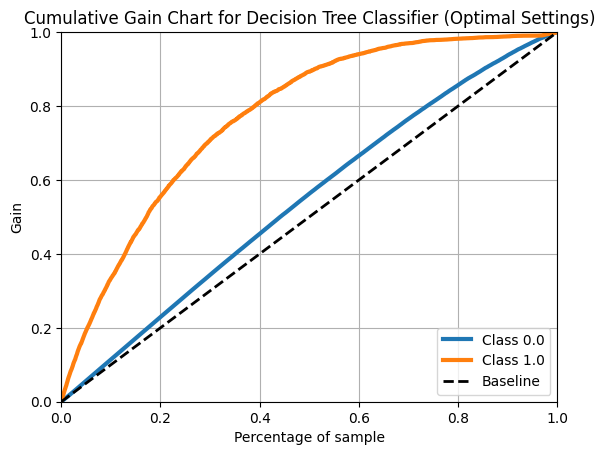

In [44]:
# Make predictions on the test set with the best estimator
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)

# Plot Cumulative Gain Chart
skplt.metrics.plot_cumulative_gain(y_test, y_prob_best_dt)
plt.title('Cumulative Gain Chart for Decision Tree Classifier (Optimal Settings)')
plt.show()

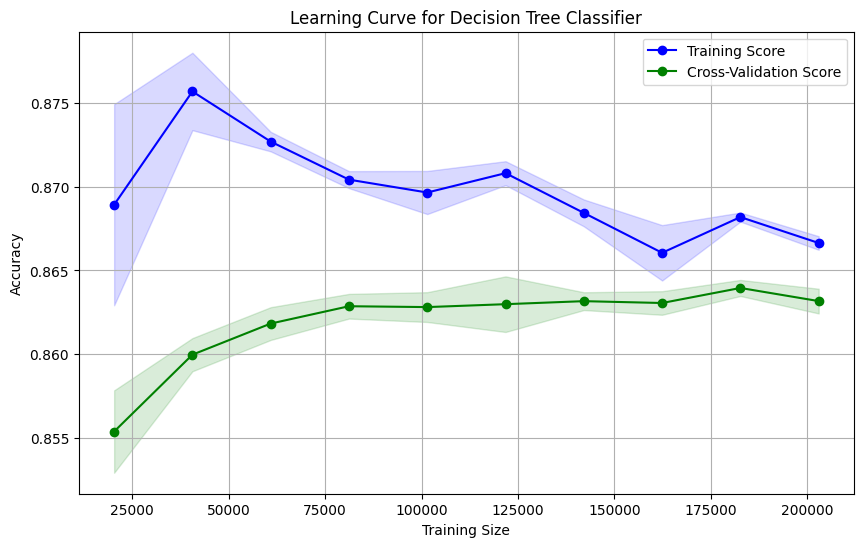

In [45]:
# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_dt_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [46]:
# Make predictions on the testing data with the best estimator
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the performance and print the classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print(f"Accuracy with Optimal Settings: {accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(class_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy with Optimal Settings: 0.8662

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.15      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



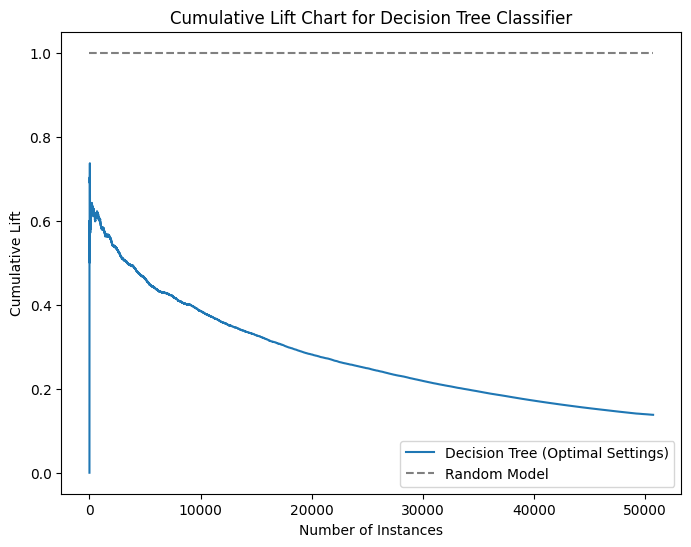

In [47]:
# Make predictions on the test set with the best estimator
y_prob_dt = best_dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the Cumulative Lift Chart
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt, pos_label=1)
sorted_indices_dt = np.argsort(y_prob_dt)[::-1]
sorted_labels_dt = y_test.to_numpy()[sorted_indices_dt]

cumulative_positives_dt = np.cumsum(sorted_labels_dt)
cumulative_total_dt = np.arange(1, len(sorted_labels_dt) + 1)

cumulative_lift_dt = cumulative_positives_dt / cumulative_total_dt

# Plot the Cumulative Lift Chart for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(cumulative_total_dt, cumulative_lift_dt, label='Decision Tree (Optimal Settings)')
plt.plot([1, len(sorted_labels_dt)], [1, 1], linestyle='--', color='grey', label='Random Model')
plt.title('Cumulative Lift Chart for Decision Tree Classifier')
plt.xlabel('Number of Instances')
plt.ylabel('Cumulative Lift')
plt.legend()
plt.show()


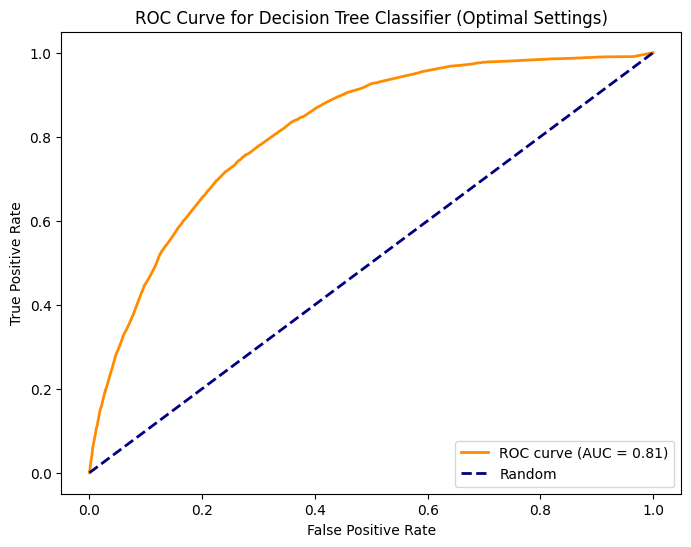

Area Under the Curve (AUC) for Decision Tree: 0.81


In [48]:
# Make predictions on the test set with the best estimator
y_prob_dt = best_dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier (Optimal Settings)')
plt.legend(loc='lower right')
plt.show()

# Display AUC value for Decision Tree
print('Area Under the Curve (AUC) for Decision Tree: {:.2f}'.format(roc_auc_dt))


In [49]:
#PART4

In [50]:
#RF

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the performance of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8599

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


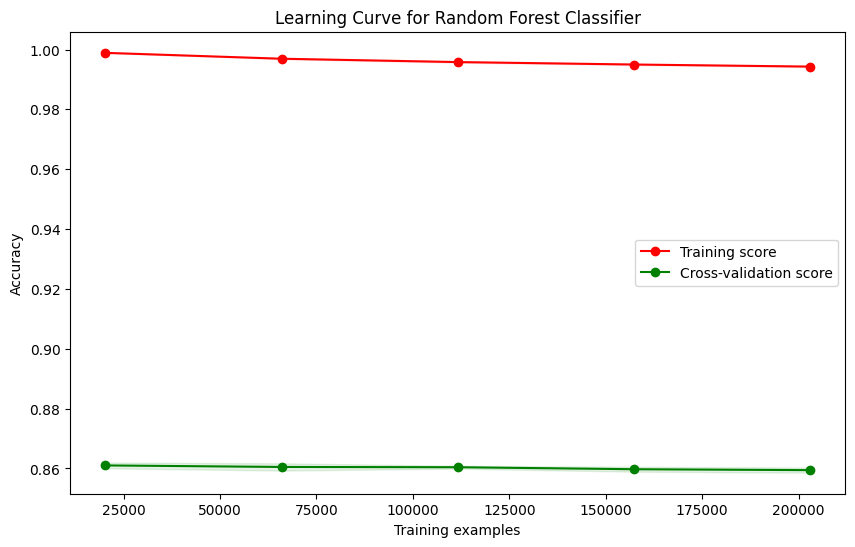

In [52]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest Classifier")
plt.legend(loc="best")
plt.show()


In [53]:
!pip install --upgrade scikit-learn


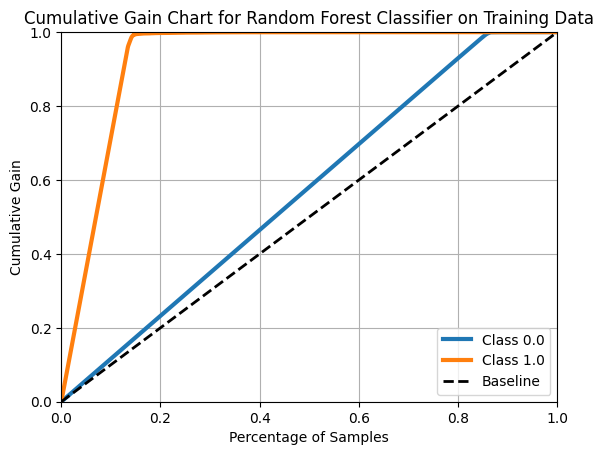

In [54]:
import scikitplot as skplt
# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Get predicted probabilities on the training set
y_prob_train = random_forest_classifier.predict_proba(X_train)

# Plot the cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_train, y_prob_train)
plt.title('Cumulative Gain Chart for Random Forest Classifier on Training Data')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.show()


In [55]:
# Make predictions on the test set
y_pred_test = random_forest_classifier.predict(X_test)

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred_test)

print("Classification Report on Test Set:\n", classification_rep)


Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



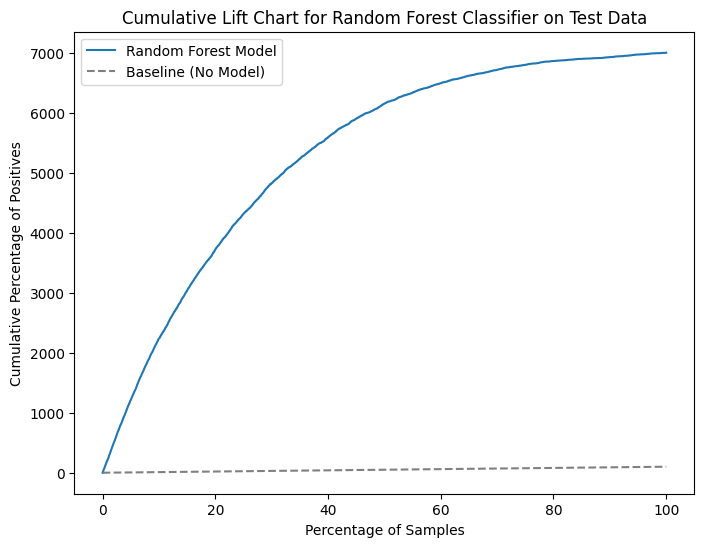

In [56]:
# Get predicted probabilities on the test set
y_prob_test = random_forest_classifier.predict_proba(X_test)[:, 1]

# Reset the index of y_test
y_test_reset_index = y_test.reset_index(drop=True)

# Calculate the cumulative percentages
total_samples = len(y_test_reset_index)
sorted_indices = np.argsort(y_prob_test)[::-1]
sorted_labels = y_test_reset_index[sorted_indices]

cumulative_positives = np.cumsum(sorted_labels)
cumulative_percent = np.arange(1, total_samples + 1) / total_samples * 100

# Calculate the baseline (no model) cumulative percentages
baseline_percent = np.arange(1, total_samples + 1) / total_samples * 100

# Plot the cumulative lift chart
plt.figure(figsize=(8, 6))
plt.plot(cumulative_percent, cumulative_positives, label='Random Forest Model')
plt.plot(cumulative_percent, baseline_percent, linestyle='--', color='gray', label='Baseline (No Model)')
plt.title('Cumulative Lift Chart for Random Forest Classifier on Test Data')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.show()


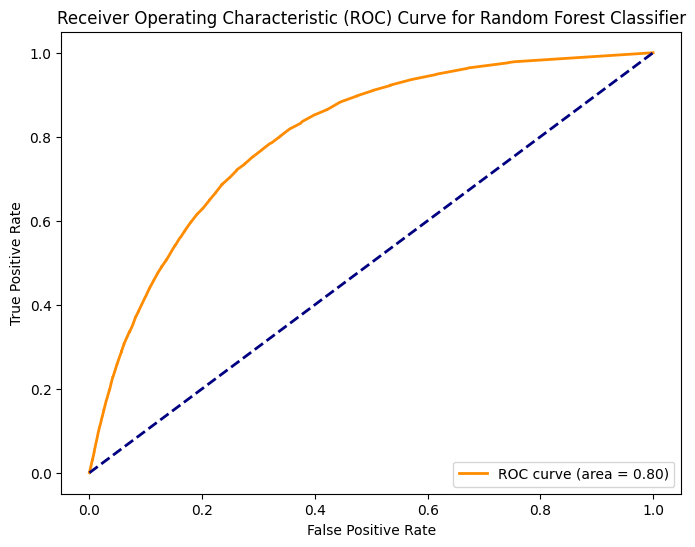

In [57]:
# Get predicted probabilities on the test set
y_prob_test = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


AUC: 0.8017


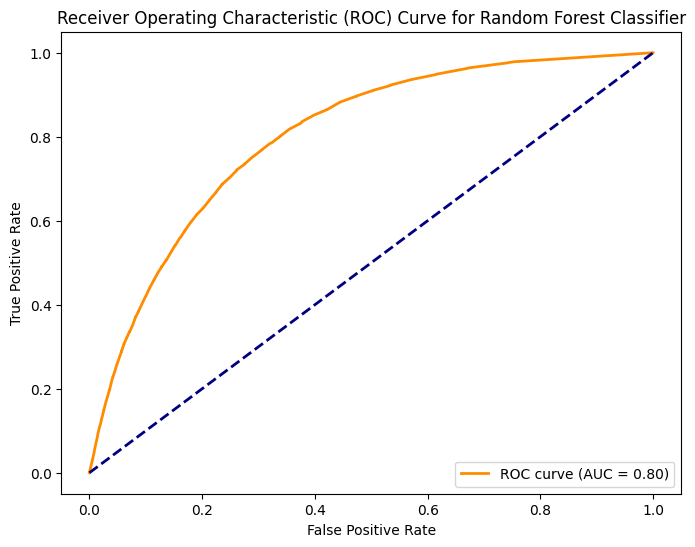

In [58]:
# Get predicted probabilities on the test set
y_prob_test = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# Print AUC value
print(f'AUC: {roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [59]:
##Project4 Part 2

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2'],               # Use 'l2' penalty with lbfgs solver
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [100, 200],            # Maximum number of iterations
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the best parameters on the training set
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the performance of the Logistic Regression classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8658

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



In [61]:
import scikitplot as skplt



In [62]:
pip install scikit-plot


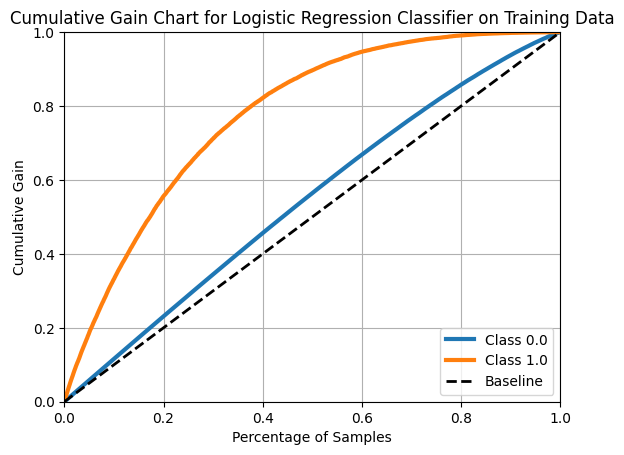

In [63]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(**best_params)  # Use the best parameters from grid search

# Train the classifier on the training set
logistic_regression_classifier.fit(X_train, y_train)

# Plot the cumulative gain chart
y_prob_train = logistic_regression_classifier.predict_proba(X_train)
skplt.metrics.plot_cumulative_gain(y_train, y_prob_train)
plt.title('Cumulative Gain Chart for Logistic Regression Classifier on Training Data')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.show()


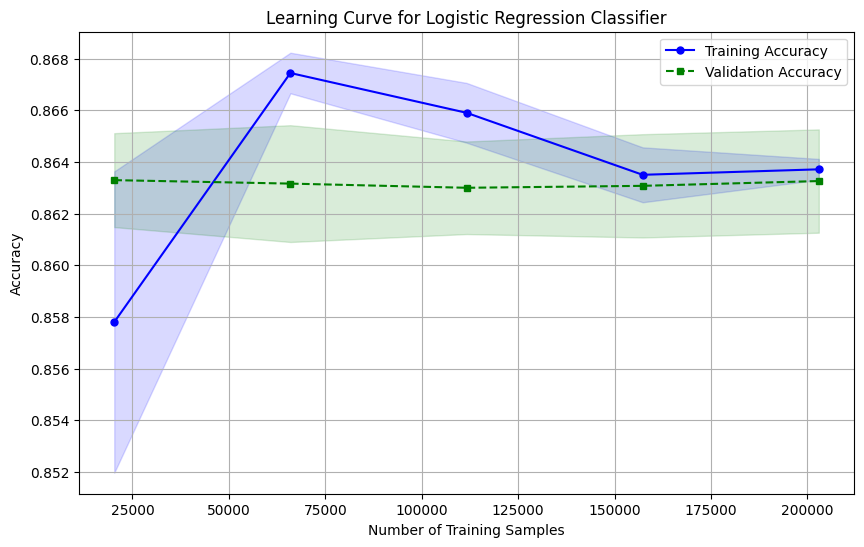

In [64]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    logistic_regression_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Logistic Regression Classifier')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Display classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



In [66]:
!pip install --upgrade scikit-learn


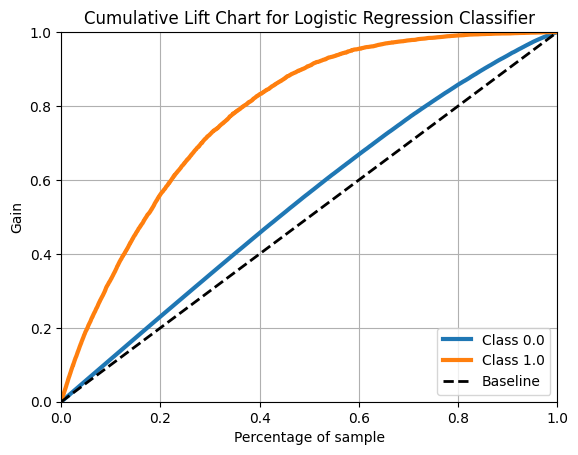

In [67]:
# Plot Cumulative Lift Chart
y_probas = best_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.title('Cumulative Lift Chart for Logistic Regression Classifier')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


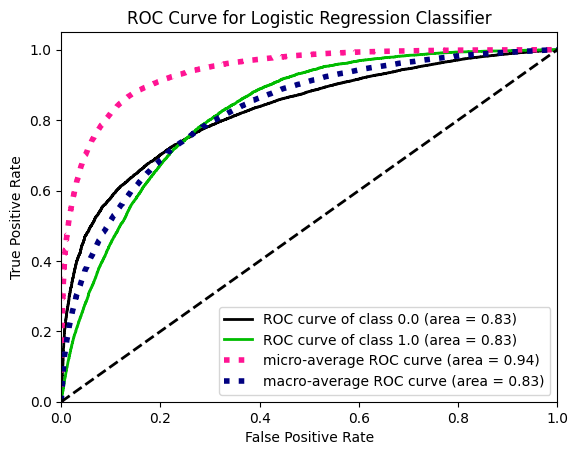

In [68]:
# Plot ROC curve with ROC values
y_probas = best_classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.title('ROC Curve for Logistic Regression Classifier')
plt.show()

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8658

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



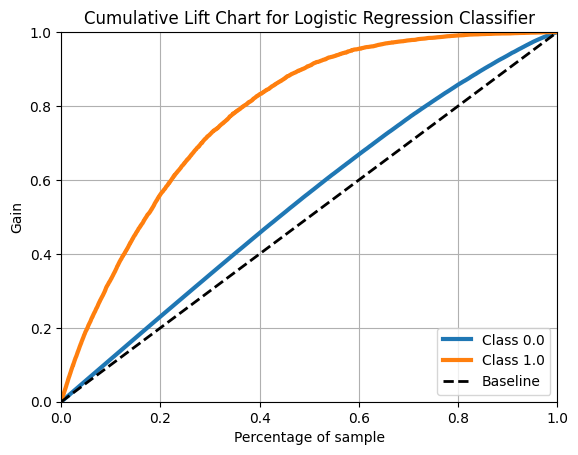

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


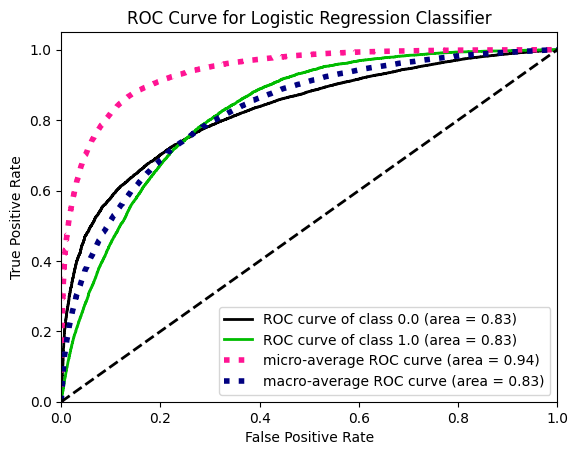

In [69]:
import scikitplot as skplt


# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2'],               # Use 'l2' penalty with lbfgs solver
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [100, 200],            # Maximum number of iterations
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the best parameters on the training set
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the performance of the Logistic Regression classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot Cumulative Lift Chart
skplt.metrics.plot_cumulative_gain(y_test, best_classifier.predict_proba(X_test))
plt.title('Cumulative Lift Chart for Logistic Regression Classifier')
plt.show()

# Plot ROC curve with ROC value
y_probas = best_classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.title('ROC Curve for Logistic Regression Classifier')
plt.show()


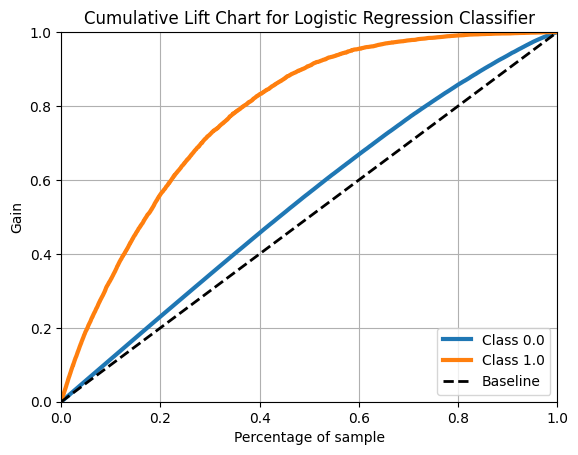

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


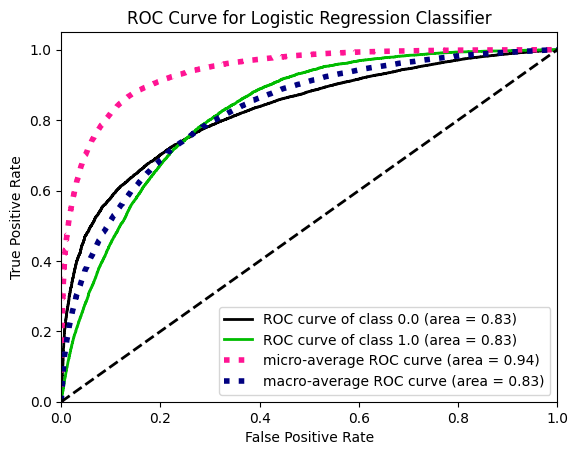

In [70]:
# Plot Cumulative Lift Chart
skplt.metrics.plot_cumulative_gain(y_test, best_classifier.predict_proba(X_test))
plt.title('Cumulative Lift Chart for Logistic Regression Classifier')
plt.show()

# Plot ROC curve with ROC value
y_probas = best_classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.title('ROC Curve for Logistic Regression Classifier')
plt.show()
